## 如何选择出对Y最重要的变量？

采用逐步回归思路： 以AIC为标准，选择或删除变量.AIC越低代表模型拟合整体越好

In [1]:
#使用step()

#举例：我们有4种水泥的指标（X1-X4），我们想确定这些指标哪些影响水泥凝固时放热情况（Y）
cement<-data.frame(
    X1=c( 7, 1, 11, 11, 7, 11, 3, 1, 2, 21, 1, 11, 10),
    X2=c(26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68),
    X3=c( 6, 15, 8, 8, 6, 9, 17, 22, 18, 4, 23, 9, 8),
    X4=c(60, 52, 20, 47, 33, 22, 6, 44, 22, 26, 34, 12, 12),
    Y =c(78.5, 74.3, 104.3, 87.6, 95.9, 109.2, 102.7, 72.5,
    93.1,115.9, 83.8, 113.3, 109.4)
)

In [2]:
cement

X1,X2,X3,X4,Y
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,26,6,60,78.5
1,29,15,52,74.3
11,56,8,20,104.3
11,31,8,47,87.6
7,52,6,33,95.9
11,55,9,22,109.2
3,71,17,6,102.7
1,31,22,44,72.5
2,54,18,22,93.1


In [3]:
lm.fit<-lm(Y ~ X1+X2+X3+X4, data=cement)

In [4]:
summary(lm.fit)


Call:
lm(formula = Y ~ X1 + X2 + X3 + X4, data = cement)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1750 -1.6709  0.2508  1.3783  3.9254 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  62.4054    70.0710   0.891   0.3991  
X1            1.5511     0.7448   2.083   0.0708 .
X2            0.5102     0.7238   0.705   0.5009  
X3            0.1019     0.7547   0.135   0.8959  
X4           -0.1441     0.7091  -0.203   0.8441  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.446 on 8 degrees of freedom
Multiple R-squared:  0.9824,	Adjusted R-squared:  0.9736 
F-statistic: 111.5 on 4 and 8 DF,  p-value: 4.756e-07


我们直接放入所有自变量，结果回归方程系数没有一项通过检验！

尝试用逐步回归的方式，放入step()函数

In [5]:
lm.step<-step(lm.fit)

Start:  AIC=26.94
Y ~ X1 + X2 + X3 + X4

       Df Sum of Sq    RSS    AIC
- X3    1    0.1091 47.973 24.974
- X4    1    0.2470 48.111 25.011
- X2    1    2.9725 50.836 25.728
<none>              47.864 26.944
- X1    1   25.9509 73.815 30.576

Step:  AIC=24.97
Y ~ X1 + X2 + X4

       Df Sum of Sq    RSS    AIC
<none>               47.97 24.974
- X4    1      9.93  57.90 25.420
- X2    1     26.79  74.76 28.742
- X1    1    820.91 868.88 60.629


由上面可知，

第一步删除中去掉X3，方程AIC最小，所以选择X3

第二步删除中在删掉任何一个变量不会改善模型。

In [6]:
summary(lm.step)


Call:
lm(formula = Y ~ X1 + X2 + X4, data = cement)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0919 -1.8016  0.2562  1.2818  3.8982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  71.6483    14.1424   5.066 0.000675 ***
X1            1.4519     0.1170  12.410 5.78e-07 ***
X2            0.4161     0.1856   2.242 0.051687 .  
X4           -0.2365     0.1733  -1.365 0.205395    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.309 on 9 degrees of freedom
Multiple R-squared:  0.9823,	Adjusted R-squared:  0.9764 
F-statistic: 166.8 on 3 and 9 DF,  p-value: 3.323e-08


## 如何诊断回归模型潜在问题？——回归诊断

潜在问题主要包括：

1. 误差项是否满足独立性、等方差性、正态性？
2. 线性模型假设是否合适？
3. 是否存在异常样本？
4. 回归结果是否对某些样本依赖过重，导致稳定性欠佳？
5. 自变量是否存在多重共线性问题？

In [7]:
#举例：有下面这样一组数据，求自变量与因变量关系
A<-data.frame(
    X=c(10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0),
    Y1=c(8.04,6.95, 7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68),
    Y2=c(9.14,8.14, 8.74,8.77,9.26,8.10,6.13,3.10, 9.13,7.26,4.74),
    Y3=c(7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39, 8.15,6.44,5.73),
    X4=c(rep(8,7), 19, rep(8,3)),
    Y4=c(6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50, 5.56,7.91,6.89)
)

In [8]:
A

X,Y1,Y2,Y3,X4,Y4
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,8.04,9.14,7.46,8,6.58
8,6.95,8.14,6.77,8,5.76
13,7.58,8.74,12.74,8,7.71
9,8.81,8.77,7.11,8,8.84
11,8.33,9.26,7.81,8,8.47
14,9.96,8.10,8.84,8,7.04
6,7.24,6.13,6.08,8,5.25
4,4.26,3.10,5.39,19,12.50
12,10.84,9.13,8.15,8,5.56


### 画四组数据的散点图和相应回归直线，见下图：
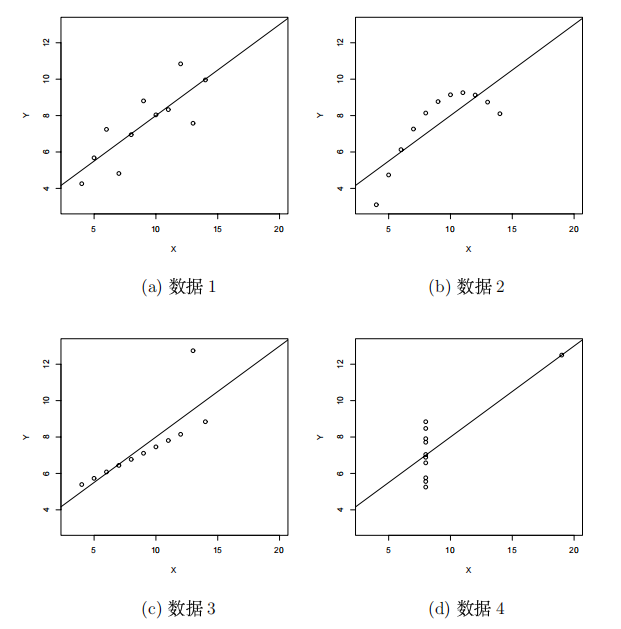

### 我们从图直观的感觉 b, c, d 用yi = β0 + β1xi + εi. 可能不正确！
1. b看起来更符合曲线变化
2. c看起来被一个异常点带偏了
3. d拿掉异常点，模型会发生巨大变化

### 但放入线性模型都得到了很好、且相似的结果

In [9]:
summary(lm(Y1~X, data=A))
summary(lm(Y2~X, data=A))
summary(lm(Y3~X, data=A))
summary(lm(Y4~X4,data=A))


Call:
lm(formula = Y1 ~ X, data = A)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.92127 -0.45577 -0.04136  0.70941  1.83882 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   3.0001     1.1247   2.667  0.02573 * 
X             0.5001     0.1179   4.241  0.00217 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.237 on 9 degrees of freedom
Multiple R-squared:  0.6665,	Adjusted R-squared:  0.6295 
F-statistic: 17.99 on 1 and 9 DF,  p-value: 0.00217



Call:
lm(formula = Y2 ~ X, data = A)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9009 -0.7609  0.1291  0.9491  1.2691 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)    3.001      1.125   2.667  0.02576 * 
X              0.500      0.118   4.239  0.00218 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.237 on 9 degrees of freedom
Multiple R-squared:  0.6662,	Adjusted R-squared:  0.6292 
F-statistic: 17.97 on 1 and 9 DF,  p-value: 0.002179



Call:
lm(formula = Y3 ~ X, data = A)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1586 -0.6159 -0.2325  0.1510  3.2407 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   3.0075     1.1244   2.675  0.02542 * 
X             0.4994     0.1179   4.237  0.00218 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.236 on 9 degrees of freedom
Multiple R-squared:  0.666,	Adjusted R-squared:  0.6289 
F-statistic: 17.95 on 1 and 9 DF,  p-value: 0.002185



Call:
lm(formula = Y4 ~ X4, data = A)

Residuals:
   Min     1Q Median     3Q    Max 
-1.751 -0.831  0.000  0.809  1.839 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   3.0017     1.1239   2.671  0.02559 * 
X4            0.4999     0.1178   4.243  0.00216 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.236 on 9 degrees of freedom
Multiple R-squared:  0.6667,	Adjusted R-squared:  0.6297 
F-statistic:    18 on 1 and 9 DF,  p-value: 0.002165


#### 1、解决非线性问题

In [10]:
#由图我们基本判断这可能更符合一个二次方曲线模型，而非线性模型
lm2.fit<-lm(Y2~X+I(X^2), data=A)

summary(lm2.fit)


Call:
lm(formula = Y2 ~ X + I(X^2), data = A)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0013287 -0.0011888 -0.0006294  0.0008741  0.0023776 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.9957343  0.0043299   -1385   <2e-16 ***
X            2.7808392  0.0010401    2674   <2e-16 ***
I(X^2)      -0.1267133  0.0000571   -2219   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.001672 on 8 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 7.378e+06 on 2 and 8 DF,  p-value: < 2.2e-16


In [11]:
summary(lm(Y2~X, data=A))


Call:
lm(formula = Y2 ~ X, data = A)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9009 -0.7609  0.1291  0.9491  1.2691 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)    3.001      1.125   2.667  0.02576 * 
X              0.500      0.118   4.239  0.00218 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.237 on 9 degrees of freedom
Multiple R-squared:  0.6662,	Adjusted R-squared:  0.6292 
F-statistic: 17.97 on 1 and 9 DF,  p-value: 0.002179


#### 2. 解决异常点问题

In [12]:
#从图上判断异常点，直接从数据中删除。
A[-3,]
summary(lm(Y3~X, data=A[-3,]))

,X,Y1,Y2,Y3,X4,Y4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,8.04,9.14,7.46,8,6.58
2,8,6.95,8.14,6.77,8,5.76
4,9,8.81,8.77,7.11,8,8.84
5,11,8.33,9.26,7.81,8,8.47
6,14,9.96,8.10,8.84,8,7.04
7,6,7.24,6.13,6.08,8,5.25
8,4,4.26,3.10,5.39,19,12.50
9,12,10.84,9.13,8.15,8,5.56
10,7,4.82,7.26,6.44,8,7.91



Call:
lm(formula = Y3 ~ X, data = A[-3, ])

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0060173 -0.0012121 -0.0010173 -0.0008225  0.0140693 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.0106277  0.0057115   702.2   <2e-16 ***
X           0.3450433  0.0006262   551.0   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.006019 on 8 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 3.036e+05 on 1 and 8 DF,  p-value: < 2.2e-16


In [13]:
A[-8,]
summary(lm(Y4~X4,data=A[-8,]))

,X,Y1,Y2,Y3,X4,Y4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,8.04,9.14,7.46,8,6.58
2,8,6.95,8.14,6.77,8,5.76
3,13,7.58,8.74,12.74,8,7.71
4,9,8.81,8.77,7.11,8,8.84
5,11,8.33,9.26,7.81,8,8.47
6,14,9.96,8.10,8.84,8,7.04
7,6,7.24,6.13,6.08,8,5.25
9,12,10.84,9.13,8.15,8,5.56
10,7,4.82,7.26,6.44,8,7.91



Call:
lm(formula = Y4 ~ X4, data = A[-8, ])

Residuals:
   Min     1Q Median     3Q    Max 
-1.751 -1.036 -0.036  0.859  1.839 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.0010     0.3908   17.92 2.39e-08 ***
X4                NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.236 on 9 degrees of freedom
